In [ ]:
! pip3 install --upgrade statsmodels

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
import seaborn as sb
import datetime

In [ ]:
os.chdir('/content/drive/MyDrive/Time Series')

In [ ]:
ls

'ARIMA Model.ipynb'        'Multiplicative model.ipynb'
'ARIMA Model New.ipynb'    'Naive Smoothing technique.ipynb'
'Auto Regression.ipynb'     regression_data.xlsx
 Debourgh-Sales.xlsx        Regression.ipynb
'First Time Series.ipynb'   sales_data.csv
'Forcasting 2.ipynb'        SmoothingTechniques.ipynb
 Forcasting.ipynb           Untitled0.ipynb
 Microsoft_Stock.csv        us_airline_carrier_passenger.csv
'Microsoft Stock.ipynb'


In [ ]:
df = pd.read_csv('Microsoft_Stock.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [ ]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

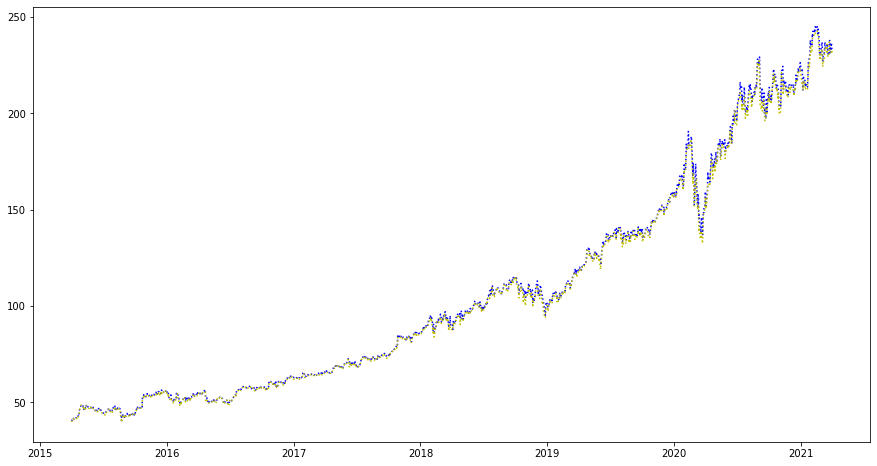

In [ ]:
plt.figure(figsize = (15,8))
plt.plot(df['Date'], df['Open'], 'b:')
#plt.plot(df['Date'], df['High'], 'g:')
plt.plot(df['Date'], df['Low'], 'y:')
#plt.plot(df['Date'], df['Close'], 'c:')
plt.show()

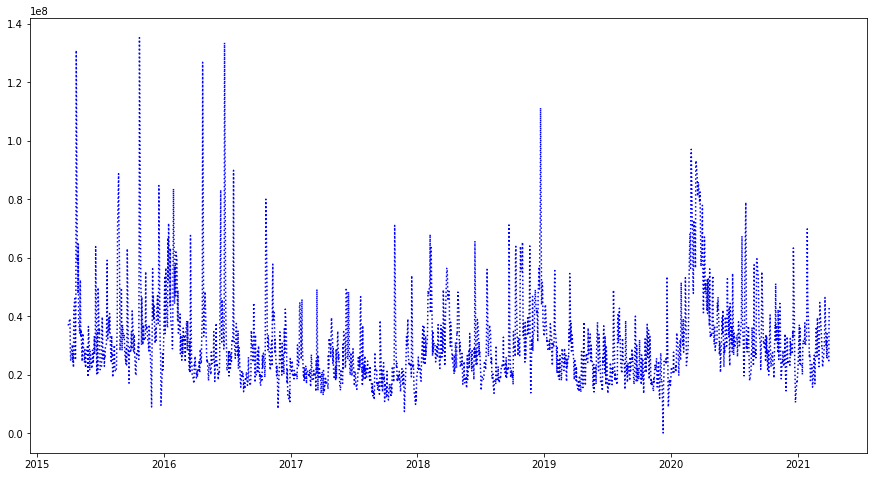

In [ ]:
plt.figure(figsize = (15,8))
plt.plot(df['Date'], df['Volume'], 'b:')

In [ ]:
df.shape

(1511, 6)

In [ ]:
df['date'] = df['Date'].dt.date

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,date
0,2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322,2015-04-01
1,2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476,2015-04-02
2,2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692,2015-04-06
3,2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375,2015-04-07
4,2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438,2015-04-08


In [ ]:
df1 = df[['Close', 'date']].copy()

In [ ]:
df1.head()

,Close,date
0,40.72,2015-04-01
1,40.29,2015-04-02
2,41.55,2015-04-06
3,41.53,2015-04-07
4,41.42,2015-04-08


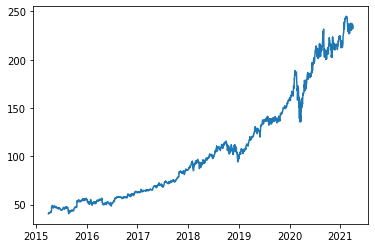

In [ ]:
plt.plot(df1['date'], df1['Close'])

In [ ]:
df1['date'] = pd.to_datetime(df['date'])


In [ ]:
df1.dtypes

Close           float64
date     datetime64[ns]
dtype: object

In [ ]:
df1 = df1[df1['date'] > datetime.datetime.strptime('2019-01-01', '%Y-%m-%d')]

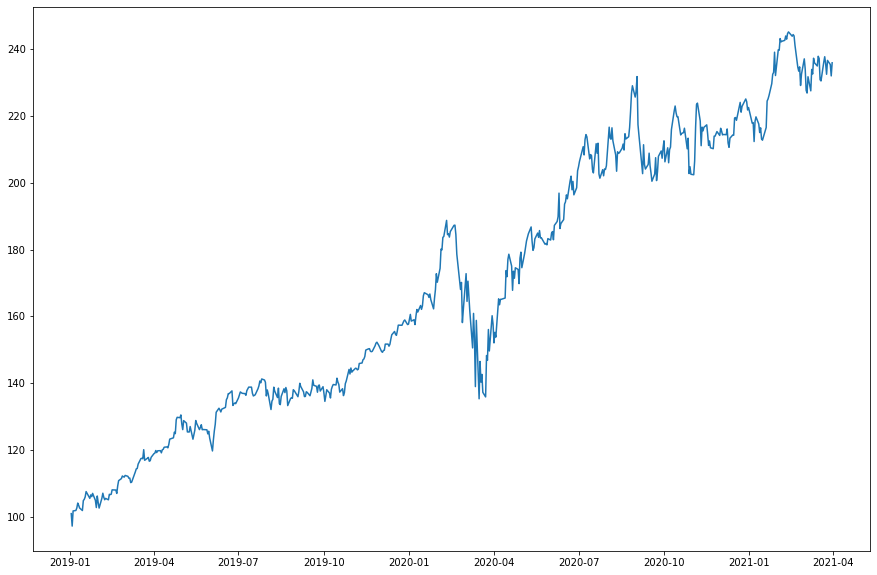

In [ ]:
plt.figure(figsize = (15,10))
plt.plot(df1['date'], df1['Close'])

In [ ]:
df1.head()

,Close,date
945,101.12,2019-01-02
946,97.40,2019-01-03
947,101.93,2019-01-04
948,102.06,2019-01-07
949,102.80,2019-01-08


In [ ]:
train1 = df1[df1['date'] <= datetime.datetime.strptime('2020-08-01', '%Y-%m-%d')]
test1 = df1[df1['date'] > datetime.datetime.strptime('2020-08-01', '%Y-%m-%d')]

In [ ]:
train1.shape, test1.shape

((399, 2), (167, 2))

In [ ]:
train = train1.set_index('date')
test = test1.set_index('date')

In [ ]:
test.head()

,Close
date,
2020-08-03,216.54
2020-08-04,213.29
2020-08-05,212.94
2020-08-06,216.35
2020-08-07,212.48


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

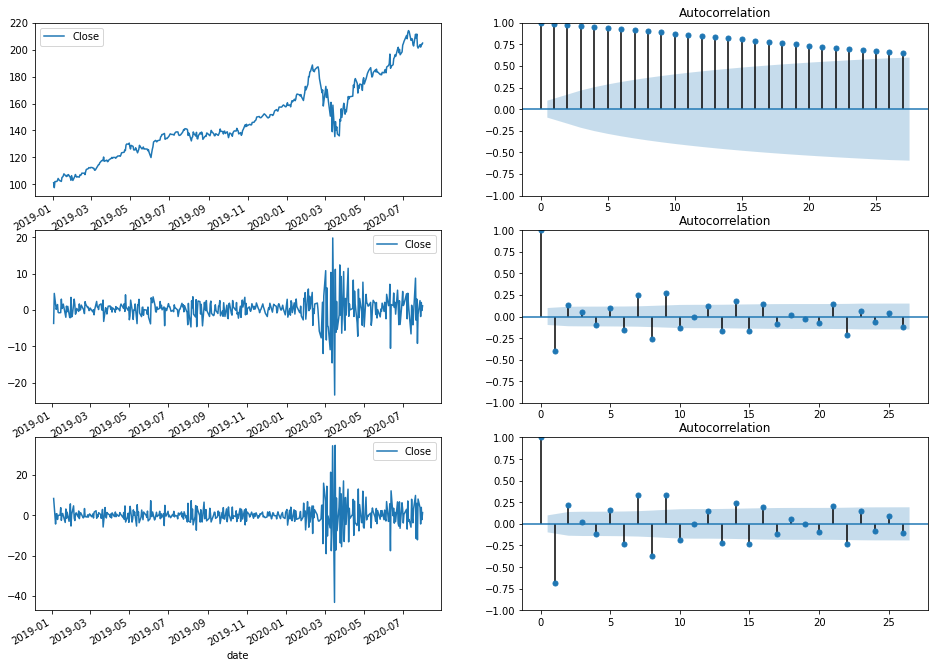

In [ ]:
fig, ax = plt.subplots(3,2, figsize = (16,12))
fig = train.plot(kind = 'line', ax = ax[0,0])
fig = plot_acf(train.dropna(), ax = ax[0,1])

fig = train.diff().plot(kind = 'line', ax = ax[1,0])
fig = plot_acf(train.diff().dropna(), ax = ax[1,1])


fig = train.diff().diff().plot(kind = 'line', ax = ax[2,0])
fig = plot_acf(train.diff().diff().dropna(), ax = ax[2,1])

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


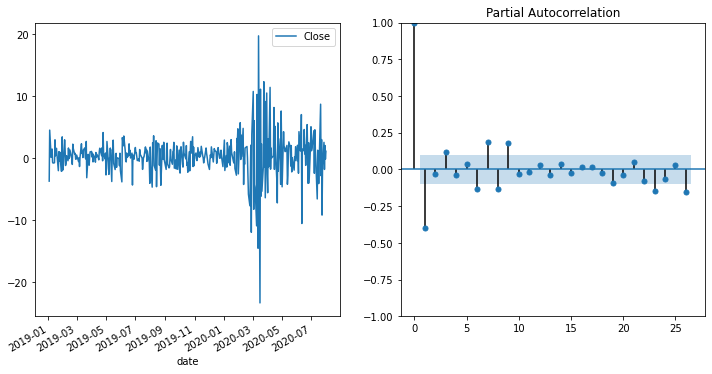

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (12,6))
fig = train.diff().plot(kind = 'line', ax = ax[0])
fig = plot_pacf(train.diff().dropna(), ax = ax[1])

In [ ]:
from statsmodels.tsa.stattools import adfuller 

In [ ]:
adfuller(train['Close'])

(-0.6803310628061361,
 0.8517786698436338,
 9,
 389,
 {'1%': -3.447272819026727,
  '10%': -2.5707433189709294,
  '5%': -2.868998737588248},
 1935.8632711021132)

In [ ]:
adfuller(train['Close'].diff().dropna())

(-5.697758833324353,
 7.802505900549659e-07,
 8,
 389,
 {'1%': -3.447272819026727,
  '10%': -2.5707433189709294,
  '5%': -2.868998737588248},
 1929.003929435054)

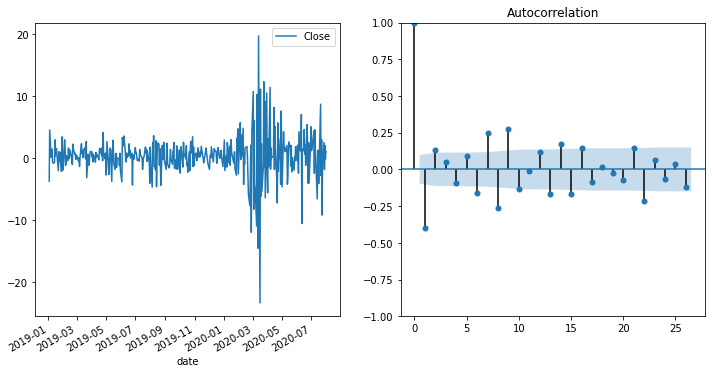

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (12,6))
fig = train.diff().plot(kind = 'line', ax = ax[0])
fig = plot_acf(train.diff().dropna(), ax = ax[1])

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model = ARIMA(train.diff(), order=(9,0,9)).fit()
print(model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  399
Model:                 ARIMA(9, 0, 9)   Log Likelihood                -992.769
Date:                Thu, 07 Oct 2021   AIC                           2025.539
Time:                        15:34:55   BIC                           2105.318
Sample:                             0   HQIC                          2057.136
                                - 399                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2686      0.160      1.680      0.093      -0.045       0.582
ar.L1         -0.4985      5.106     -0.098      0.922     -10.506       9.509
ar.L2          0.3157      1.744      0.181      0.8

In [ ]:
residual = pd.DataFrame(model.resid)

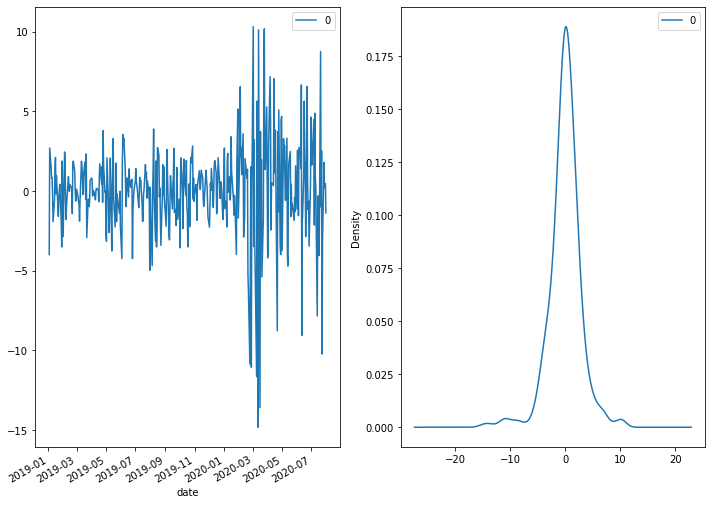

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (12,9))
fig = residual.plot(kind = 'line', ax = ax[0])
fig = residual.plot(kind = 'kde', ax = ax[1])

In [ ]:
train1.head()

,Close,date
945,101.12,2019-01-02
946,97.40,2019-01-03
947,101.93,2019-01-04
948,102.06,2019-01-07
949,102.80,2019-01-08


In [ ]:
predicted = model.predict(start = (datetime.datetime.strptime('2019-01-02','%Y-%m-%d')), end = (datetime.datetime.strptime('2020-07-31','%Y-%m-%d')))

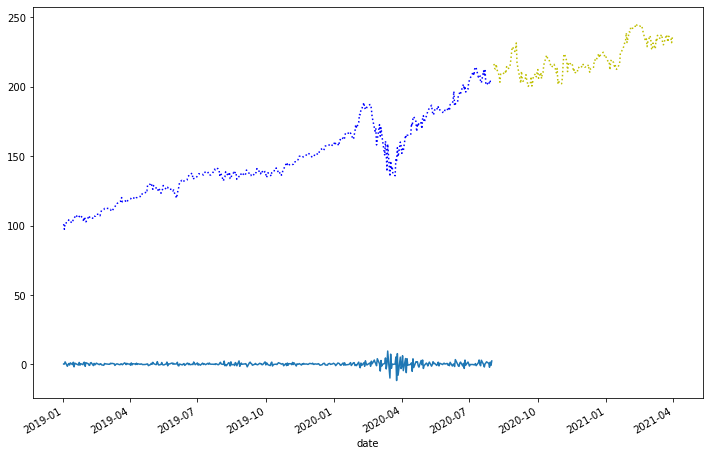

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(train1['date'], train1['Close'], 'b:')
plt.plot(test1['date'], test1['Close'], 'y:')
predicted.plot(kind = 'line')
plt.show()

In [ ]:
forecast = 101.12 + np.cumsum(predicted)

In [ ]:
val = forecast.values

In [ ]:
train1['predicted'] = val

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train1.tail()

,Close,date,predicted
1339,203.85,2020-07-27,209.738933
1340,202.02,2020-07-28,207.698631
1341,204.06,2020-07-29,209.349243
1342,203.90,2020-07-30,208.720838
1343,205.01,2020-07-31,211.212449


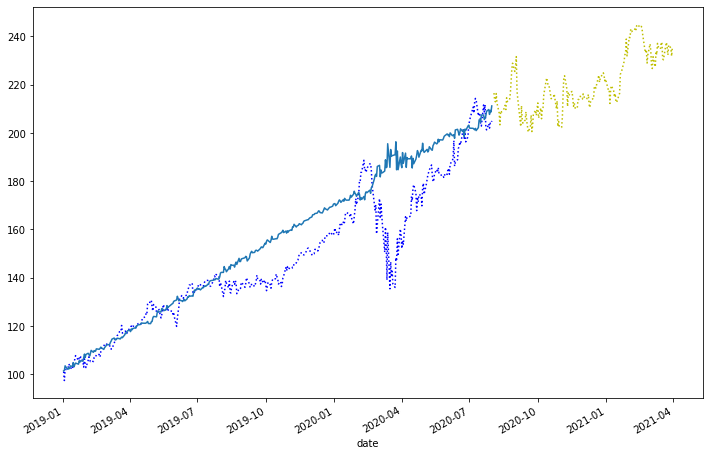

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(train1['date'], train1['Close'], 'b:')
plt.plot(test1['date'], test1['Close'], 'y:')
forecast.plot(kind = 'line')
plt.show()

In [ ]:
test1.shape

(167, 2)

In [ ]:
val1 = model.forecast(167, alpha = 0.05).values

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:393: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [ ]:
predicted1 = 205.01 + np.cumsum(val1)

In [ ]:
test1['predicted'] = predicted1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test1.head()

,Close,date,predicted
1344,216.54,2020-08-03,203.277552
1345,213.29,2020-08-04,204.850887
1346,212.94,2020-08-05,203.597012
1347,216.35,2020-08-06,202.991688
1348,212.48,2020-08-07,205.075356


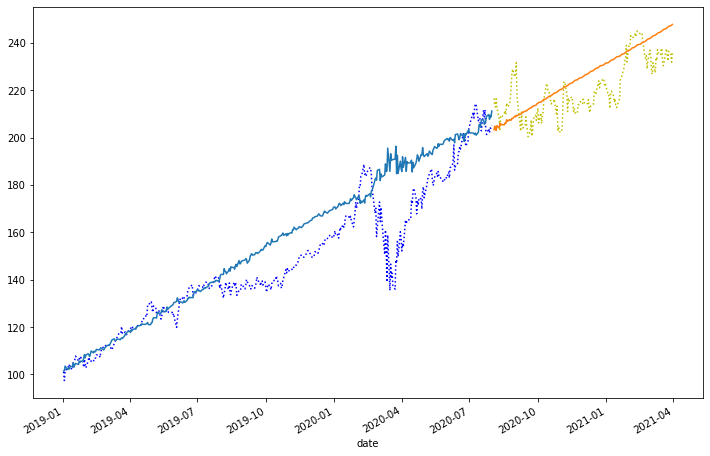

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(train1['date'], train1['Close'], 'b:')
plt.plot(test1['date'], test1['Close'], 'y:')
forecast.plot(kind = 'line')
plt.plot(test1['date'], test1['predicted'])
plt.show()

In [ ]:
se = error = train1['Close'] - train1['predicted']
error

945    -0.268592
946    -4.257185
947    -1.563515
948    -0.088608
949     0.708387
          ...   
1339   -5.888933
1340   -5.678631
1341   -5.289243
1342   -4.820838
1343   -6.202449
Length: 399, dtype: float64

In [ ]:
se = error.std()

In [ ]:
me = 1.96 * se
me

21.899488998730444

In [ ]:
upper = test1['predicted'] + me
lower = test1['predicted'] - me

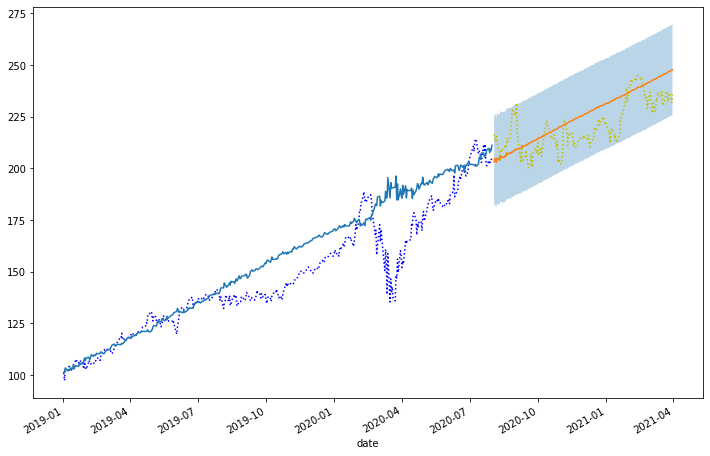

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(train1['date'], train1['Close'], 'b:')
plt.plot(test1['date'], test1['Close'], 'y:')
forecast.plot(kind = 'line')
plt.plot(test1['date'], test1['predicted'])
plt.fill_between(test1['date'], (upper), (lower), alpha = 0.3)
#start = datetime.datetime.strptime('2020-02-01', '%Y-%m-%d')
#end = datetime.datetime.strptime('2020-06-01', '%Y-%m-%d')
#plt.axis(xmin = (start), xmax = (end))
plt.show()

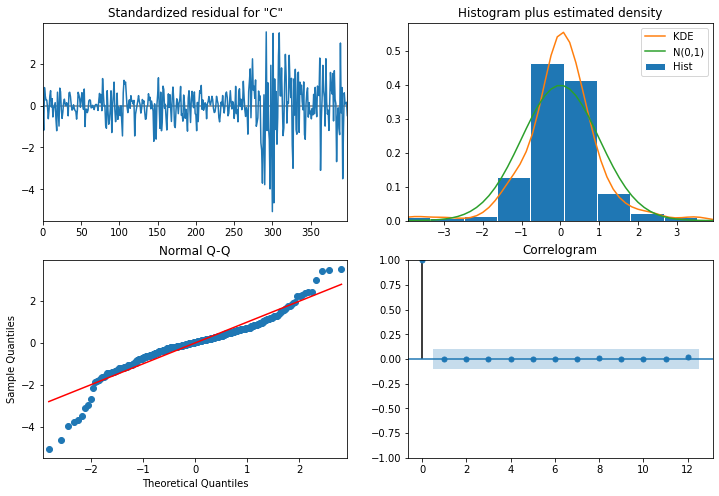

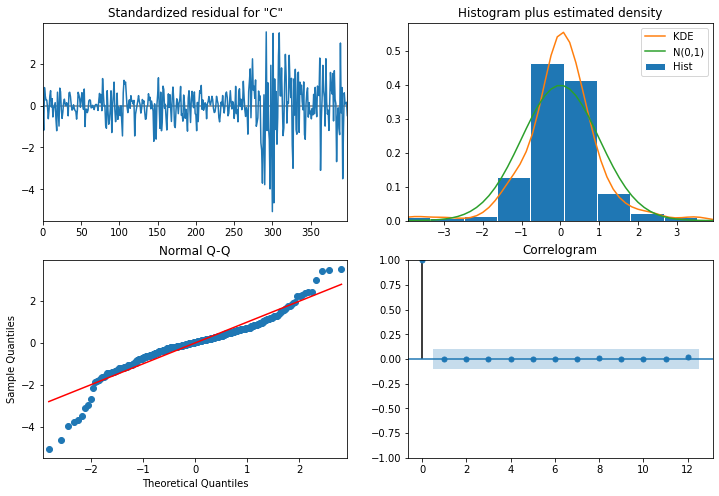

In [ ]:
fig = plt.figure(figsize = (12,8))
model.plot_diagnostics(lags = 12, fig = fig)